# Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from skrebate import ReliefF

pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)

In [3]:
df = pd.read_csv('./CICIDS2017/Wednesday-workingHours.pcap_ISCX.csv')

Show first 10 rows of data

In [4]:
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Count total number of columns

In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
df.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1008
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

In [7]:
# rename Label columns
df = df.rename(columns={' Label': 'Label'})

Also, we remove NaN/Null/Inf Values

In [8]:
df.isnull().any().any()

True

In [9]:
# Replace Inf values with NaN
df = df.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
df = df.dropna()
# Double check these are all gone
df.isnull().any().any()

False

Get more details

In [10]:
df.dtypes

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                      int64


In [11]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,691406.000000,6.914060e+05,691406.000000,691406.000000,6.914060e+05,6.914060e+05,691406.000000,691406.000000,691406.000000,691406.000000,...,691406.000000,691406.000000,6.914060e+05,6.914060e+05,6.914060e+05,6.914060e+05,6.914060e+05,6.914060e+05,6.914060e+05,6.914060e+05
mean,5683.120410,2.805421e+07,9.570718,10.232957,5.561296e+02,1.702833e+04,234.028258,15.048008,60.665921,83.050292,...,6.132624,26.755827,9.241782e+04,4.769783e+04,1.630416e+05,6.327032e+04,2.215270e+07,4.752643e+05,2.256399e+07,2.177450e+07
std,15722.340146,4.278968e+07,747.898242,985.127233,6.169395e+03,2.243276e+06,604.234467,51.113069,157.770839,226.309897,...,715.825482,6.323615,7.013504e+05,4.746482e+05,1.095619e+06,6.056634e+05,3.814785e+07,4.492673e+06,3.850662e+07,3.810129e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.020000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.156100e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.308687e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.833333,129.046988,...,2.000000,32.000000,9.920000e+02,0.000000e+00,9.920000e+02,9.890000e+02,1.600000e+07,0.000000e+00,1.810000e+07,1.000000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


Explore attack in dataset

In [12]:
# Distribution of Dataset
df['Label'].value_counts()

Label
BENIGN              439683
DoS Hulk            230124
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

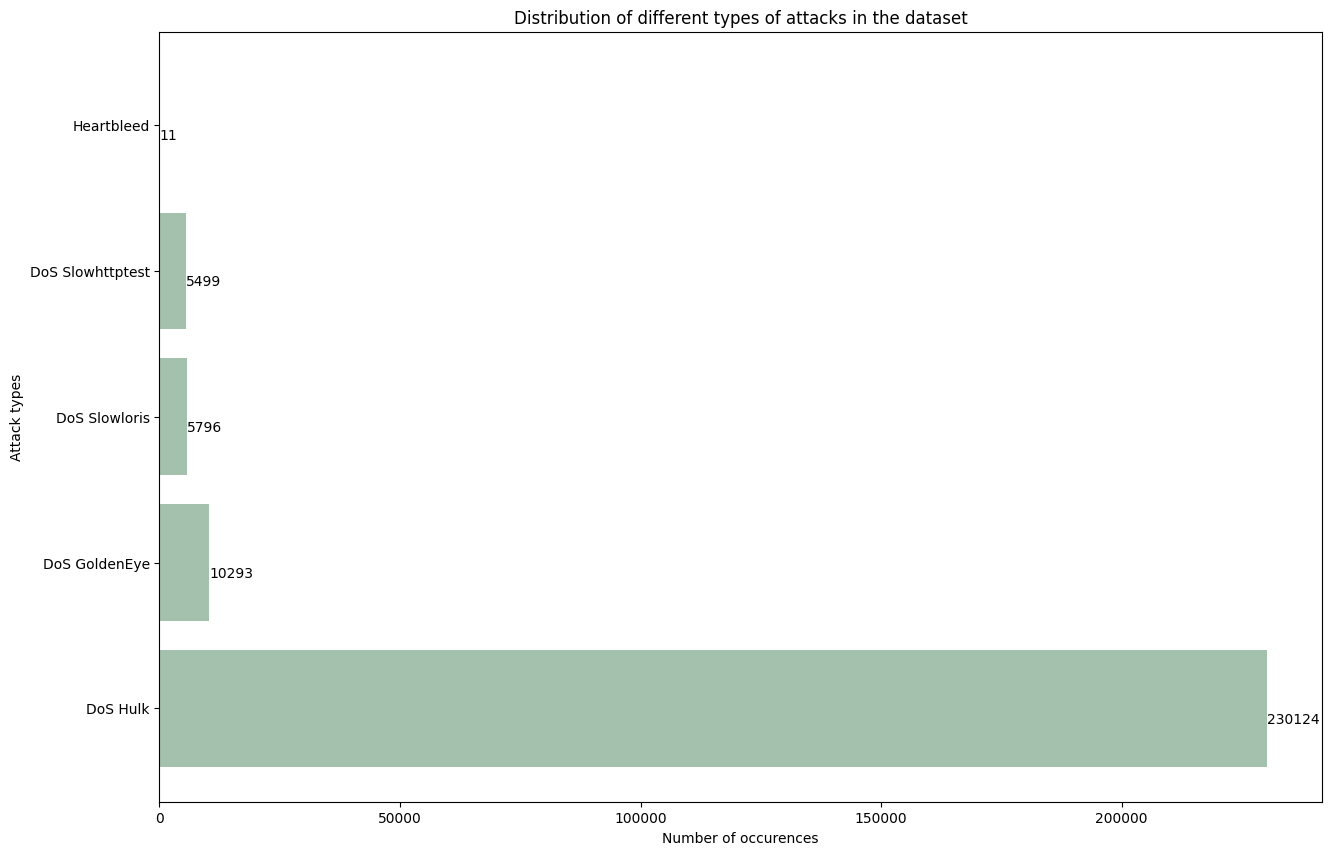

In [13]:
plt.figure(figsize=(15,10))

attack = ('DoS Hulk', 'DoS GoldenEye', 'DoS Slowloris',
          'DoS Slowhttptest', 'Heartbleed')
y_pos = np.arange(len(attack)) 
amount = df['Label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

There are only 11 instances of Heartbleed. So, we will drop it since it will not be sufficient trianing data.

In [14]:
df = df.replace(['Heartbleed'], np.nan)
df = df.dropna()
df['Label'].value_counts()

Label
BENIGN              439683
DoS Hulk            230124
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Name: count, dtype: int64

We will add a binary attack column - indicating a 0 if benign, or 1 if there was an attack.

And, group attack methods

In [15]:
# Create attack column, containing binary labels
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [17]:
attack_group = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack', 
                'XSS': 'web_attack'}
# Create grouped label column
df['Label_Category'] = df['Label'].map(lambda x: attack_group[x])
df['Label_Category'].value_counts()

Label_Category
benign    439683
dos       251712
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

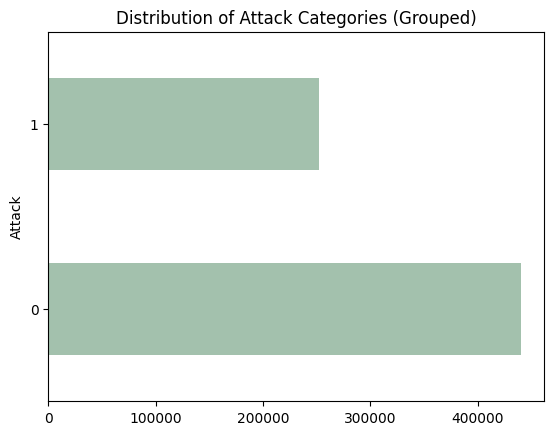

In [18]:
train_attacks = df['Attack'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

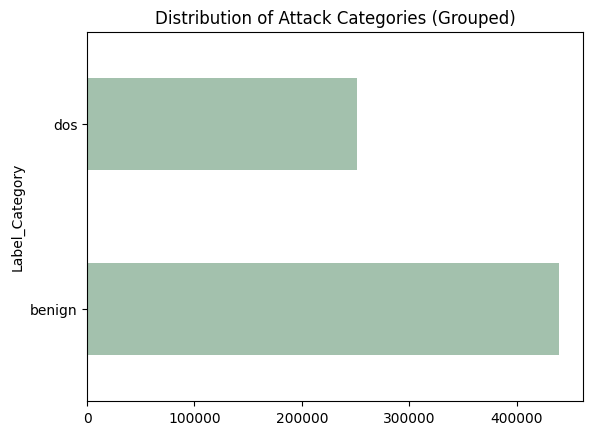

In [19]:
train_attacks = df['Label_Category'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories')

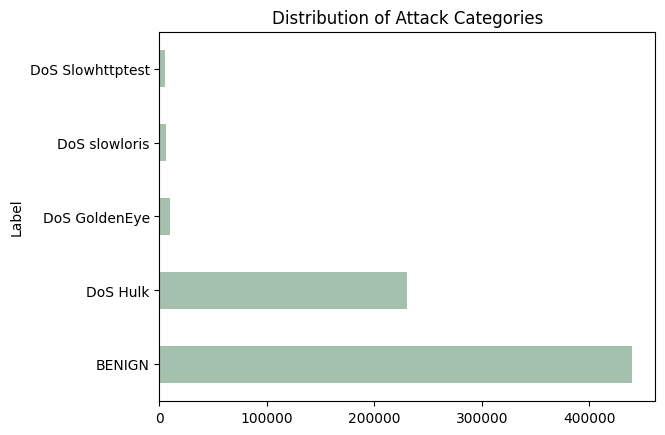

In [20]:
train_attacks = df['Label'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories')

## Split Data

Split data using 60:20:20 ratio, for training, test and validation dataset. We stratified so that the attack rate remained the same across all 3 sets.

In [21]:
# 3 Different labeling options
attacks = ['Label', 'Label_Category', 'Attack']

# xs=feature vectors, ys=labels
xs = df.drop(attacks, axis=1)
ys = df[attacks]

# split dataset - stratified
x_train, x_temp, y_train, y_temp = train_test_split(xs, ys, test_size=0.4, random_state=0, stratify=ys['Label'])
x_test, x_validate, y_test, y_validate = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp['Label'])

In [22]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

[' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' CWE Flag Count',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

Drop these because they only contain one value, and so are redundant as columns

In [23]:
x_train = x_train.drop(to_drop, axis=1)
x_validate = x_validate.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
dataset_copy = df.drop(to_drop, axis=1)

## Normalization

Using minmax normalisation

In [24]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_validate = min_max_scaler.transform(x_validate)
x_test = min_max_scaler.transform(x_test)

# All values between 0 and 1
pd.Series(x_train.flatten()).describe()

count    2.820892e+07
mean     7.277912e-02
std      1.989903e-01
min      0.000000e+00
25%      0.000000e+00
50%      6.382809e-06
75%      6.764701e-03
max      1.000000e+00
dtype: float64

## Feature Selection

Use ReliefF select k best First, score all the features

In [36]:
fs = ReliefF(n_neighbors=50)

# Use a smaller subset of the data for feature selection
subset_size = 10000  # Adjust this value based on your available memory
x_train_subset = x_train[:subset_size]
y_train_subset = y_train.Label.values[:subset_size]

# fit features to the training dataset
fs.fit(x_train_subset.astype(np.float32), y_train_subset)

ReliefF(n_neighbors=50)

In [37]:

# Use a smaller subset of the data for feature selection
subset_size = 10000  # Adjust this value based on your available memory
x_train_subset = x_train[:subset_size]
y_train_subset = y_train.Label.values[:subset_size]

# fit features to the training dataset
fs.fit(x_train_subset.astype(np.float32), y_train_subset)

ReliefF(n_neighbors=50)

In [38]:
len(x_train)

414837

In [39]:
len(fs.feature_importances_)

68

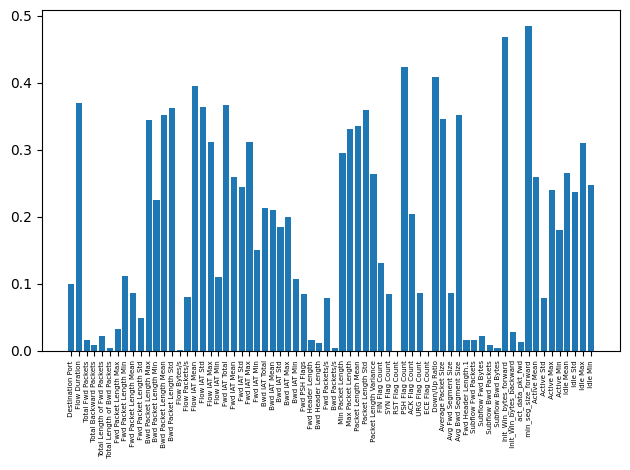

In [40]:
selected_features = dataset_copy.columns[:len(fs.feature_importances_)]

# plot the score associated with each feature
plt.bar([i for i in range(len(fs.feature_importances_))], fs.feature_importances_)
plt.xticks([i for i in range(len(fs.feature_importances_))], selected_features)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.savefig('features.png', dpi=300)

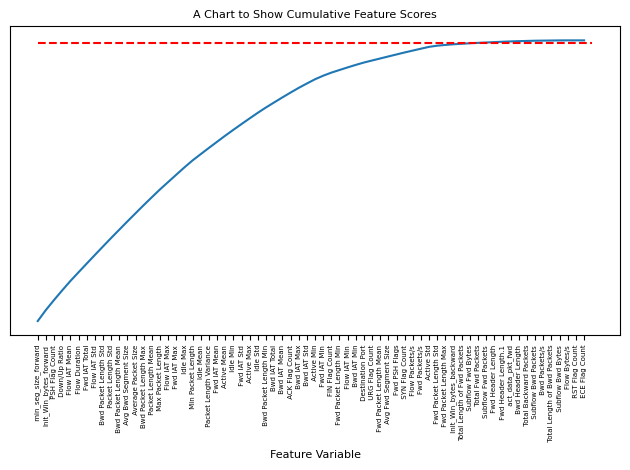

In [41]:
# sort the features by importance score
feature_importances = zip(dataset_copy.columns, fs.feature_importances_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
#plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features.png', dpi=300)

We select 40 features. 99% of the information is contained in the first 40, so this is the cut off point

In [ ]:
# perform ReliefF with n_features_to_select=40, n_neighbors=100
features = ReliefF(n_features_to_select=40, n_neighbors=100)

subset_size = 20000  # Adjust this value based on your available memory
x_train_subset = x_train[:subset_size]
y_train_subset = y_train.Label.values[:subset_size]

fit = features.fit(x_train_subset.astype(np.float32), y_train_subset)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)
x_validate = fit.transform(x_validate)

Need to find out what are the new features that we need to collect

In [45]:
selected_features_indexes = fit.top_features_[:40]
selected_features = dataset_copy.columns[selected_features_indexes]

In [47]:
selected_features

Index(['Init_Win_bytes_forward', ' min_seg_size_forward', ' PSH Flag Count',
       ' Down/Up Ratio', ' Flow IAT Mean', ' Flow Duration', 'Fwd IAT Total',
       ' Flow IAT Std', ' Bwd Packet Length Std', ' Packet Length Std',
       ' Avg Bwd Segment Size', ' Bwd Packet Length Mean',
       ' Average Packet Size', 'Bwd Packet Length Max', ' Packet Length Mean',
       ' Max Packet Length', ' Flow IAT Max', ' Fwd IAT Max',
       ' Min Packet Length', ' Idle Max', 'Active Mean',
       ' Packet Length Variance', 'Idle Mean', ' Active Max', ' Fwd IAT Mean',
       ' Idle Std', ' Idle Min', ' Fwd IAT Std', ' Bwd Packet Length Min',
       ' ACK Flag Count', 'Bwd IAT Total', ' Bwd IAT Mean', ' Active Min',
       ' Bwd IAT Max', ' Bwd IAT Std', ' Fwd IAT Min', 'FIN Flag Count',
       ' Destination Port', ' Flow IAT Min', ' Bwd IAT Min'],
      dtype='object')

In [48]:
features_dataset = dataset_copy[selected_features]

Save to CSV

In [49]:
features_dataset.to_csv('features_dataset.csv', index=False)